# 🔬 MindSpore Basics: A Deep Learning Workflow

<details>
<summary><strong>📋 About This Lab & Benefits</strong></summary>

This experiment introduces the basic components of the MindSpore framework and walks through a typical deep learning workflow.

**Objectives:**

- 🎯 Understand the core concepts of MindSpore.
- 🔧 Learn the process of data handling, model creation, training, and evaluation.
- 📈 Gain hands-on experience with a complete deep learning pipeline.

</details>

## 📊 Introduction to Tensors
Understanding the fundamental data structure of MindSpore.

**Create a tensor**

In [43]:
from warnings import filterwarnings
filterwarnings('ignore')

# Import MindSpore.
import mindspore
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # Show all results in a cell.
import numpy as np
from mindspore import Tensor # a multi-dimensional array
from mindspore import dtype
# Use an array to create a tensor.
x = Tensor(np.array([[1, 2], [3, 4]]), dtype.int32)
x

Tensor(shape=[2, 2], dtype=Int32, value=
[[1, 2],
 [3, 4]])

In [44]:
# Use a number to create tensors.
y = Tensor(1.0, dtype.int32)
z = Tensor(2, dtype.int32)
y
z

Tensor(shape=[], dtype=Int32, value= 1)

Tensor(shape=[], dtype=Int32, value= 2)

In [45]:
# Use Boolean to create a tensor.
m = Tensor(True, dtype.bool_)
m

Tensor(shape=[], dtype=Bool, value= True)

In [46]:
# Use a tuple to create a tensor.
n = Tensor((1, 2, 3), dtype.int32)
n

Tensor(shape=[3], dtype=Int32, value= [1, 2, 3])

In [47]:
# Use a list to create a tensor.
p = Tensor([1, 2, 3], dtype.int32)
p

Tensor(shape=[3], dtype=Int32, value= [1, 2, 3])

In [48]:
# Inherit attributes of another tensor to form a new tensor
from mindspore import ops # a module of operators
oneslike = ops.OnesLike() # create a tensor with all elements set to ones   
x = Tensor(np.array([[0, 1], [2, 1]]).astype(np.int32))
output = oneslike(x) # 
output

Tensor(shape=[2, 2], dtype=Int32, value=
[[1, 1],
 [1, 1]])

In [49]:
# Output constant tensor value.
from mindspore.ops import operations as ops
shape = (2, 2)
ones = ops.Ones()
output = ones(shape,dtype.float32)
print(output)
zeros = ops.Zeros()
output = zeros(shape, dtype.float32)
print(output)

[[1. 1.]
 [1. 1.]]
[[0. 0.]
 [0. 0.]]


**Tensor Attributes**

In [50]:
x = Tensor(np.array([[1, 2], [3, 4]]), dtype.int32)
# Shape
x.shape
# Data type
x.dtype
# Dimension
x.ndim
# Size
x.size

(2, 2)

mindspore.int32

2

4

**Tensor Methods**

In [51]:
y = Tensor(np.array([[True, True], [False, False]]), dtype.bool_)
# Convert the tensor data type to NumPy.
y.asnumpy()

array([[ True,  True],
       [False, False]])

**Tensor Operations**

In [52]:
# Perform indexing and slicing
tensor = Tensor(np.array([[0, 1], [2, 3]]).astype(np.float32))
print("First row: {}".format(tensor[0]))
print("First column: {}".format(tensor[:, 0]))
print("Last column: {}".format(tensor[..., -1]))

First row: [0. 1.]
First column: [0. 2.]
Last column: [1. 3.]


In [53]:
# Concatenate tensors.
data1 = Tensor(np.array([[0, 1], [2, 3]]).astype(np.float32))
data2 = Tensor(np.array([[4, 5], [6, 7]]).astype(np.float32))
op = ops.Stack()
output = op([data1, data2])
print(output)

[[[0. 1.]
  [2. 3.]]

 [[4. 5.]
  [6. 7.]]]


In [54]:
# Convert to NumPy.
output.asnumpy()

array([[[0., 1.],
        [2., 3.]],

       [[4., 5.],
        [6., 7.]]], dtype=float32)

## 📁 Loading a Dataset
Preparing your data for the model.

<Figure size 800x800 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Label: 4')

<AxesSubplot:>

Text(0.5, 1.0, 'Label: 4')

<AxesSubplot:>

Text(0.5, 1.0, 'Label: 8')

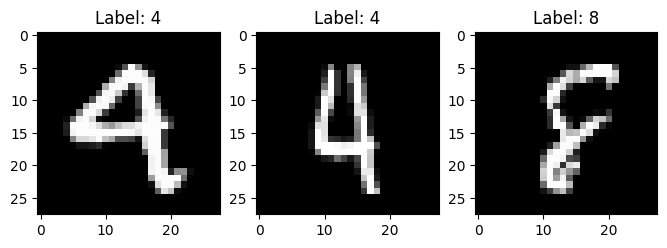

In [55]:
# Load the MNIST dataset.
import os
import mindspore.dataset as ds
import matplotlib.pyplot as plt
dataset_dir = "train" # Path of the dataset
# Read three images from the MNIST dataset.
mnist_dataset = ds.MnistDataset(dataset_dir=dataset_dir, num_samples=3)
# View the images and set the image sizes.
plt.figure(figsize=(8,8))
i = 1
# Print three subgraphs.
for data in mnist_dataset.create_dict_iterator():
    image = data["image"].asnumpy() # Convert to NumPy.
    label = data["label"].asnumpy() # Convert to NumPy.
    plt.subplot(1, 3, i)
    plt.imshow(image.reshape(28, 28), cmap='gray') # Reshape and display the image.
    plt.title("Label: {}".format(label))
    i += 1
plt.show()

In [56]:
# Customize a dataset.
import numpy as np
np.random.seed(58)
class DatasetGenerator:
	# When a dataset object is instantiated, the __init__ function is called. You can perform operations such as data initialization.
	def __init__(self):
		self.data = np.random.sample((5, 2))
		self.label = np.random.sample((5, 1))
	
	# Define the __getitem__ function of the dataset class to support random access and obtain and 
	# return data in the dataset based on the specified index value.
	def __getitem__(self, index):
		return self.data[index], self.label[index]
	
	# Define the __len__ function of the dataset class and return the number of samples in the dataset.
	def __len__(self):
		return len(self.data)

# After the dataset class is defined, the GeneratorDataset API can be used to load and access dataset 
# Create an instance of the dataset
dataset_generator = DatasetGenerator()

# Create a GeneratorDataset
generator_dataset = ds.GeneratorDataset(dataset_generator, ["data", "label"])

# Use the create_dict_iterator method to obtain data.
for data in generator_dataset.create_dict_iterator():
	print("Data:", data["data"].asnumpy())
	print("Label:", data["label"].asnumpy())
	print("---")

Data: [0.49606035 0.07562207]
Label: [0.38068183]
---
Data: [0.81585667 0.96883469]
Label: [0.77994068]
---
Data: [0.57176158 0.28963401]
Label: [0.16271622]
---
Data: [0.30880446 0.37487617]
Label: [0.54738768]
---
Data: [0.36510558 0.45120592]
Label: [0.78888122]
---


In [57]:
# Perform data augmentation.
# Set a random seed to ensure that the random results are consistent each time the code is run.
ds.config.set_seed(58)

# Shuffle the data sequence. buffer_size indicates the size of the shuffled buffer in the dataset.
generator_dataset = generator_dataset.shuffle(buffer_size=5)

# Divide the dataset into batches. batch_size indicates the number of data records contained in each
generator_dataset = generator_dataset.batch(batch_size=2)
# batch.
# Use the create_dict_iterator method to obtain data.
for data in generator_dataset.create_dict_iterator():
    print("Data:", data["data"].asnumpy())
    print("Label:", data["label"].asnumpy())
    print("---")

Data: [[0.49606035 0.07562207]
 [0.57176158 0.28963401]]
Label: [[0.38068183]
 [0.16271622]]
---
Data: [[0.30880446 0.37487617]
 [0.81585667 0.96883469]]
Label: [[0.54738768]
 [0.77994068]]
---
Data: [[0.36510558 0.45120592]]
Label: [[0.78888122]]
---


Text(0.5, 1.0, 'Label: 4')

(-0.5, 27.5, 27.5, -0.5)

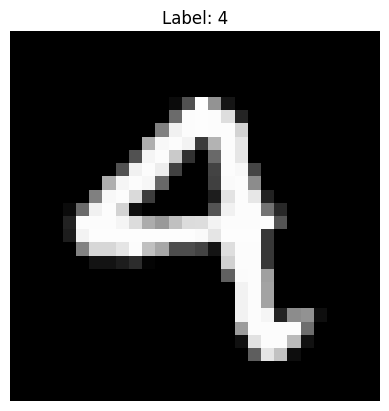

Text(0.5, 1.0, 'Label: 4')

(-0.5, 27.5, 27.5, -0.5)

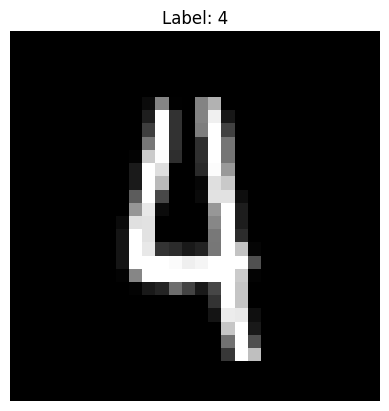

Text(0.5, 1.0, 'Label: 8')

(-0.5, 27.5, 27.5, -0.5)

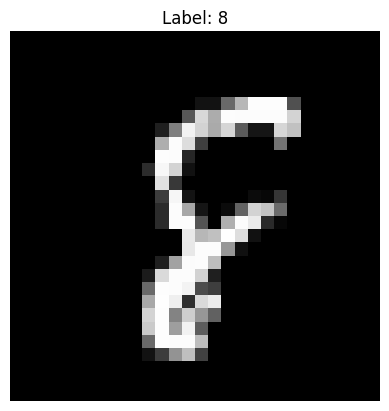

Text(0.5, 1.0, 'Label: 3')

(-0.5, 27.5, 27.5, -0.5)

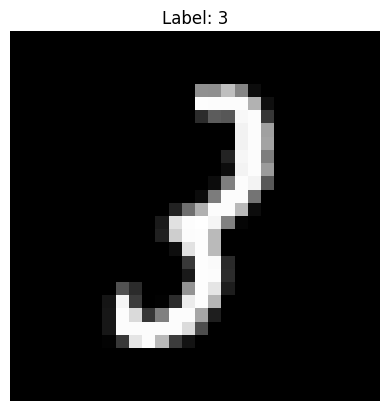

Text(0.5, 1.0, 'Label: 3')

(-0.5, 27.5, 27.5, -0.5)

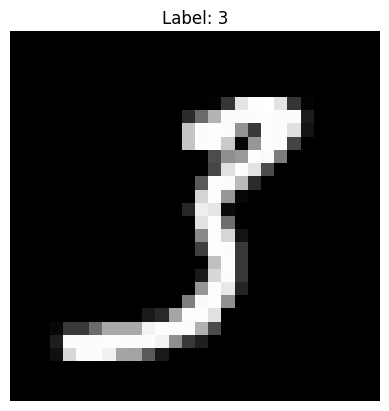

Text(0.5, 1.0, 'Label: 3')

(-0.5, 27.5, 27.5, -0.5)

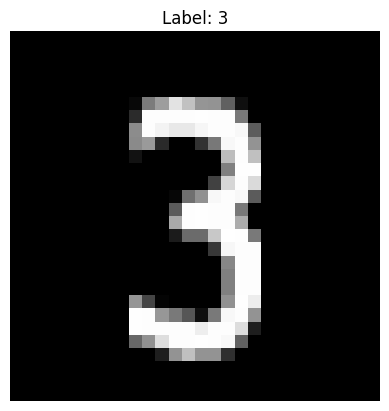

In [58]:
import matplotlib.pyplot as plt
from mindspore.dataset.vision import Inter
import mindspore.dataset.vision.c_transforms as c_vision
DATA_DIR = 'train'
# Obtain six samples.
mnist_dataset = ds.MnistDataset(dataset_dir=DATA_DIR, num_samples=6)
# View the original image data.
for data in mnist_dataset.create_dict_iterator():
    plt.imshow(data["image"].asnumpy().squeeze(), cmap='gray')
    plt.title(f"Label: {data['label'].asnumpy()}")
    plt.axis('off')
    plt.show()

[WARNING] ME(7080:130505123827840,MainProcess):2025-09-12-18:09:21.932.946 [mindspore/dataset/core/validator_helpers.py:744] 'Resize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Resize' from mindspore.dataset.vision instead.
[WARNING] ME(7080:130505123827840,MainProcess):2025-09-12-18:09:21.936.342 [mindspore/dataset/core/validator_helpers.py:744] 'RandomCrop' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'RandomCrop' from mindspore.dataset.vision instead.


Text(0.5, 1.0, '4')

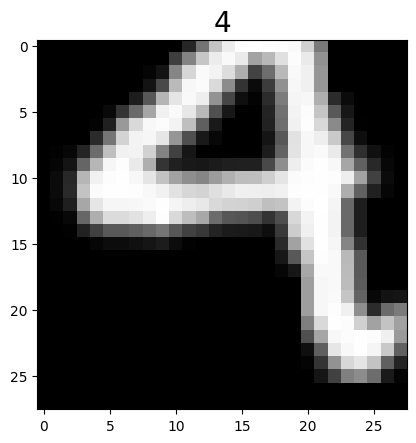

In [59]:
resize_op = c_vision.Resize(size=(40,40), interpolation=Inter.LINEAR)
crop_op = c_vision.RandomCrop(28)
transforms_list = [resize_op, crop_op]
mnist_dataset = mnist_dataset.map(operations=transforms_list, input_columns=["image"])
mnist_dataset = mnist_dataset.create_dict_iterator()
data = next(mnist_dataset)
plt.imshow(data['image'].asnumpy().squeeze(), cmap=plt.cm.gray)
plt.title(data['label'].asnumpy(), fontsize=20)
plt.show()

## 🏛️ Building the Network
Defining the architecture of your deep learning model.

In [60]:
import mindspore as ms
import mindspore.nn as nn # a module of neural network
from mindspore import Tensor # a multi-dimensional array
import numpy as np
# Construct the input tensor.
input_a = Tensor(np.array([[1, 1, 1], [2, 2, 2]]), ms.float32)
print(input_a)
# Construct a fully-connected network. Set both in_channels and out_channels to 3.
net = nn.Dense(in_channels=3, out_channels=3, weight_init=1)
output = net(input_a)
print(output)

[[1. 1. 1.]
 [2. 2. 2.]]
[[3.1284747 3.0900786 3.5357811]
 [6.1284747 6.0900784 6.5357814]]


In [61]:
# Build a convolutional layer which used for image feature extraction.
conv2d = nn.Conv2d(1, 6, 5, has_bias=False, weight_init='normal', pad_mode='valid')
input_x = Tensor(np.ones([1, 1, 32, 32]), ms.float32)
print(conv2d(input_x).shape)

(1, 6, 28, 28)


In [62]:
# Build a ReLU layer which used for non-linear transformation.
relu = nn.ReLU()
input_x = Tensor(np.array([-1, 2, -3, 2, -1]), ms.float16)
output = relu(input_x)
print(output)

[0. 2. 0. 2. 0.]


In [63]:
# Build a pooling layer which used for image downsampling.
max_pool2d = nn.MaxPool2d(kernel_size=2, stride=2)
input_x = Tensor(np.ones([1, 6, 28, 28]), ms.float32)
print(max_pool2d(input_x).shape)

(1, 6, 14, 14)


In [64]:
# Build a Flatten layer which used to flatten the input.
flatten = nn.Flatten()
input_x = Tensor(np.ones([1, 16, 5, 5]), ms.float32)
output = flatten(input_x)
print(output.shape)

(1, 400)


In [65]:
# Define a model class and view parameters of each layer.
class LeNet5(nn.Cell):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, has_bias=False, weight_init='normal', pad_mode='valid')
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, 5, has_bias=False, weight_init='normal', pad_mode='valid')
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Dense(16*4*4, 120, weight_init='normal', bias_init='zeros')
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Dense(120, 84, weight_init='normal', bias_init='zeros')
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Dense(84, 10, weight_init='normal', bias_init='zeros')

    def construct(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        x = self.relu4(x)
        x = self.fc3(x)
        return x
net = LeNet5()
# view the layer parameters
for param in net.get_parameters():
    print(f"('{param.name}', {param})")

('conv1.weight', Parameter (name=conv1.weight, shape=(6, 1, 5, 5), dtype=Float32, requires_grad=True))
('conv2.weight', Parameter (name=conv2.weight, shape=(16, 6, 5, 5), dtype=Float32, requires_grad=True))
('fc1.weight', Parameter (name=fc1.weight, shape=(120, 256), dtype=Float32, requires_grad=True))
('fc1.bias', Parameter (name=fc1.bias, shape=(120,), dtype=Float32, requires_grad=True))
('fc2.weight', Parameter (name=fc2.weight, shape=(84, 120), dtype=Float32, requires_grad=True))
('fc2.bias', Parameter (name=fc2.bias, shape=(84,), dtype=Float32, requires_grad=True))
('fc3.weight', Parameter (name=fc3.weight, shape=(10, 84), dtype=Float32, requires_grad=True))
('fc3.bias', Parameter (name=fc3.bias, shape=(10,), dtype=Float32, requires_grad=True))


## 📈 Training and Validating a Model
Fitting the model to the data and checking its performance.

In [66]:
# Use loss functions which used to measure the difference between the predicted value and the true value.
import numpy as np
import mindspore.nn as nn
from mindspore import Tensor
import mindspore.dataset as ds
import mindspore as ms
loss = nn.L1Loss()
output_data = Tensor(np.array([[1, 2, 3], [2, 3, 4]]).astype(np.float32))
target_data = Tensor(np.array([[0, 2, 5], [3, 1, 1]]).astype(np.float32))
print(loss(output_data, target_data))

1.5


In [67]:
# Use an optimizer which used to update the parameters of the network towards minimizing the loss function.
net = LeNet5()
# Define a loss function.
loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')
# Define an optimizer. Set the learning rate to 0.01 and the momentum to 0.9.
optimizer = nn.Momentum(net.trainable_params(), learning_rate=0.01, momentum=0.9)
# View the optimizer parameters.
print(optimizer)

Momentum<>


In [68]:
# Build a model.
from mindspore import Model
# Define a neural network.
net = LeNet5()
# Define the loss function.
loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')
# Define the optimizer.
optim = nn.Momentum(params=net.trainable_params(), learning_rate=0.1, momentum=0.9)
# Build a model.
model = Model(network = net, loss_fn=loss, optimizer=optim, metrics={'accuracy'})

In [ ]:
# Define data preprocessing function to avoid duplication
import mindspore.dataset.transforms.c_transforms as C
import mindspore.dataset.vision.c_transforms as CV

def create_mnist_dataset(data_dir, batch_size=32):
    """
    Create and preprocess MNIST dataset.
    
    Args:
        data_dir (str): Directory path for the dataset ('train' or 'test')
        batch_size (int): Batch size for the dataset
    
    Returns:
        Dataset: Preprocessed MNIST dataset
    """
    # Load dataset
    dataset = ds.MnistDataset(data_dir)
    
    # Define preprocessing operations (defined once)
    resize_op = CV.Resize((28, 28))
    rescale_op = CV.Rescale(1/255, 0)
    hwc2chw_op = CV.HWC2CHW()
    type_cast_op = C.TypeCast(ms.int32)
    
    # Apply transformations
    dataset = dataset.map(input_columns="image", operations=[rescale_op, resize_op, hwc2chw_op])
    dataset = dataset.map(input_columns="label", operations=type_cast_op)
    dataset = dataset.batch(batch_size)
    
    return dataset

In [ ]:
# Train the model.
from mindspore.train.callback import LossMonitor

# Create training dataset using the utility function
mnist_dataset = create_mnist_dataset('train', batch_size=32)

# Configure training callback
loss_cb = LossMonitor(per_print_times=1000)

# Train the model - dataset is the training set, epoch indicates the number of training epochs
model.train(epoch=1, train_dataset=mnist_dataset, callbacks=[loss_cb])

[WARNING] ME(7080:130505123827840,MainProcess):2025-09-12-18:09:22.342.593 [mindspore/dataset/core/validator_helpers.py:744] 'Resize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Resize' from mindspore.dataset.vision instead.
[WARNING] ME(7080:130505123827840,MainProcess):2025-09-12-18:09:22.343.576 [mindspore/dataset/core/validator_helpers.py:744] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Rescale' from mindspore.dataset.vision instead.
[WARNING] ME(7080:130505123827840,MainProcess):2025-09-12-18:09:22.344.366 [mindspore/dataset/core/validator_helpers.py:744] 'HWC2CHW' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'HWC2CHW' from mindspore.dataset.vision instead.
[WARNING] ME(7080:130505123827840,MainProcess):2025-09-12-18:09:22.345.234 [mindspore/dataset

epoch: 1 step: 1000, loss is 2.283555746078491


In [ ]:
# Validate the model.
# Create test dataset using the utility function
test_dataset = create_mnist_dataset('test', batch_size=32)

# Evaluate the model on test set
model.eval(valid_dataset=test_dataset)

[WARNING] ME(7080:130505123827840,MainProcess):2025-09-12-18:09:43.709.906 [mindspore/dataset/core/validator_helpers.py:744] 'Resize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Resize' from mindspore.dataset.vision instead.
[WARNING] ME(7080:130505123827840,MainProcess):2025-09-12-18:09:43.711.012 [mindspore/dataset/core/validator_helpers.py:744] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Rescale' from mindspore.dataset.vision instead.
[WARNING] ME(7080:130505123827840,MainProcess):2025-09-12-18:09:43.711.920 [mindspore/dataset/core/validator_helpers.py:744] 'HWC2CHW' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'HWC2CHW' from mindspore.dataset.vision instead.
[WARNING] ME(7080:130505123827840,MainProcess):2025-09-12-18:09:43.713.044 [mindspore/dataset

{'accuracy': 0.1135}

## 💼 Saving and Loading a Model
Persisting your trained model for future use.

In [71]:
import mindspore as ms

# net indicates a defined network model, which is used before or after training.
ms.save_checkpoint(net, "./MyNet.ckpt") # net indicates the training network, and ./MyNet.ckpt indicates the path for saving the network model.

In [72]:
# Set the model saving parameters and save the model during training.
from mindspore.train.callback import ModelCheckpoint, CheckpointConfig

# Set the value of epoch_num.
epoch_num = 5

# Set model saving parameters.
config_ck = CheckpointConfig(save_checkpoint_steps=1875, keep_checkpoint_max=10)

# Use model saving parameters.
ckpoint = ModelCheckpoint(prefix="lenet", directory="./lenet", config=config_ck)
model.train(epoch_num, mnist_dataset, callbacks=[ckpoint])

## ⚙️ Automatic Differentiation
Exploring how MindSpore computes gradients.

In [73]:
# Compute the first-order derivative of the input.
import numpy as np
import mindspore.nn as nn
import mindspore.ops as ops
from mindspore import Tensor
from mindspore import ParameterTuple, Parameter
from mindspore import dtype as mstype

# Output [[4.5099998 2.7 3.6000001]
#         [4.5099998 2.7 3.6000001]]
class GradNetWrtX(nn.Cell):
    def __init__(self, net):
        super(GradNetWrtX, self).__init__()
        self.net = net
        self.grad_op = ops.GradOperation()

    def construct(self, x, y):
        gradient_function = self.grad_op(self.net)
        return gradient_function(x, y)

class GradNetWrtParams(nn.Cell):
    def __init__(self, net):
        super(GradNetWrtParams, self).__init__()
        self.net = net
        self.params = ParameterTuple(net.trainable_params())
        self.grad_op = ops.GradOperation(get_by_list=True)

    def construct(self, x, y):
        return self.grad_op(self.net, self.params)(x, y)

# Define network and loss function
net = nn.Dense(3, 3, weight_init='ones', bias_init='zeros')
loss = nn.MSELoss()

# Create a combined network that includes loss
class NetWithLoss(nn.Cell):
    def __init__(self, network, loss_fn):
        super(NetWithLoss, self).__init__()
        self.network = network
        self.loss_fn = loss_fn

    def construct(self, x, y):
        out = self.network(x)
        return self.loss_fn(out, y)

net_with_loss = NetWithLoss(net, loss)
grad_net = GradNetWrtParams(net_with_loss)

x = Tensor(np.array([[1, 2, 3], [4, 5, 6]]).astype(np.float32))
y = Tensor(np.array([[0, 1, 0], [1, 0, 1]]).astype(np.float32))
print(grad_net(x, y))

(Tensor(shape=[3, 3], dtype=Float32, value=
[[ 2.06666679e+01,  2.73333359e+01,  3.40000000e+01],
 [ 2.16666660e+01,  2.83333340e+01,  3.50000000e+01],
 [ 2.06666679e+01,  2.73333359e+01,  3.40000000e+01]]), Tensor(shape=[3], dtype=Float32, value= [ 6.66666698e+00,  6.66666698e+00,  6.66666698e+00]))


In [74]:
# Compute the first-order derivative of the weight.
import numpy as np
import mindspore.nn as nn
import mindspore.ops as ops
from mindspore import Tensor
from mindspore import ParameterTuple, Parameter
from mindspore import dtype as mstype

# Output (Tensor(shape=[1], dtype=Float32, value= [ 2.15359993e+01]),)
class GradNetWrtParams(nn.Cell):
    def __init__(self, net):
        super(GradNetWrtParams, self).__init__()
        self.net = net
        self.params = ParameterTuple(net.trainable_params())
        self.grad_op = ops.GradOperation(get_by_list=True)

    def construct(self, x):
        return self.grad_op(self.net, self.params)(x)

# Define a simple function to differentiate
def func(x):
    return x**2 + 2*x + 1

# Create a simple network that implements this function
class SimpleNet(nn.Cell):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.weight = Parameter(Tensor([2.0], mstype.float32), name="weight")
    
    def construct(self, x):
        return self.weight * x**2 + 2*self.weight * x + self.weight

net = SimpleNet()
grad_net = GradNetWrtParams(net)

x = Tensor([3.0], mstype.float32)
result = grad_net(x)
print(result)

(Tensor(shape=[1], dtype=Float32, value= [ 1.60000000e+01]),)
